In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [0]:
model = pickle.load(open('LinearRegressionModel.sav','rb'))

In [69]:
mergedData = pd.read_csv('mergeded_clean.csv')
mergedData.keys()

Index(['grs_zones', 'lga11_name', 'id_areas', 'settlement', '2011_population',
       '2016_population', '2021_population', '2026_population',
       '2031_population', '2036_population', '2041_population',
       '2046_population', '2051_population', '2011_dwellings',
       '2016_dwellings', '2021_dwellings', '2026_dwellings', '2031_dwellings',
       '2036_dwellings', '2041_dwellings', '2046_dwellings', '2051_dwellings'],
      dtype='object')

In [0]:
#for prediction
def make_prediction(dataset,year_to_predict,regression_model):
  print(dataset.keys())
  temp_dataset = dataset.copy()
  temp_dataset['year'] = year_to_predict
  predicted_data = regression_model.predict(temp_dataset)
  ratio = find_population_per_dwelling_ratio(dataset,predicted_data,year_to_predict)
  #determine_surplus_or_deficiency(ratio)
  plot_graph(dataset,predicted_data)
  ##Coefficient of determination (r**2) calculation
  #col_name = year_to_predict+'_dwellings'
  #print("r2 Score : {}".format(mergedData[col_name],predicted_data))
  print("Ratio of poplation per dwelling in year {} : {}".format(year_to_predict,ratio))

In [0]:
def plot_graph(dataset,predicted_data):
  plt.title(label="population vs Predicted Dwelling")
  plt.plot(dataset[year_to_predict],predicted_data)
  #plt.plot(mergedData['2051_population'],mergedData['2051_dwellings'])
  plt.show()

In [0]:
def find_population_per_dwelling_ratio(dataset,predicted_data,year):
  population_per_dwelling = []
  for population,dwelling in zip(dataset[year],predicted_data):
    population_per_dwelling.append(population/dwelling)

  return np.mean(population_per_dwelling)

In [0]:
def determine_surplus_or_deficiency(predicted_ratio)

Index(['grs_zones', '2051'], dtype='object')


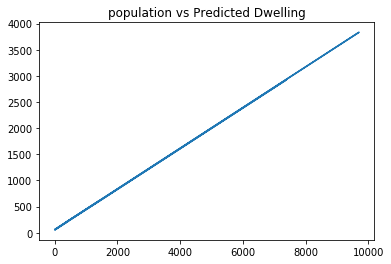

Ratio of poplation per dwelling in year 2051 : 1.9093936401419327


In [91]:
year_to_predict = '2051'
to_predict = pd.read_csv('testDataset.csv')
make_prediction(to_predict,year_to_predict,model)